In [1]:
%load_ext zipline
%load_ext watermark

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import zipline
from yahoofinancials import YahooFinancials
import warnings
import pandas_datareader as pdr
plt.style.use('seaborn')

plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 200
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
watermark --iversions

### There are two methods to use a custom dataset, one is shown below which converts dataframe into panel, the other one using zipline bundle ingest, check 'Zipline Local Pipeline' notebook for that.

In [5]:
import pandas as pd
from collections import OrderedDict
import pytz
import pandas_datareader as pdr

def get_from_pdr_to_panel(symbol="NVDA", datefrom="2016-01-01", dateto="2018-01-01"):
    nvidia=pdr.get_data_yahoo(symbol, datefrom, dateto)
    nvidia.head()
    data = OrderedDict()
    data[symbol] = nvidia
    data[symbol] = data[symbol][["Open","High","Low","Close","Volume"]]
    #print(data[symbol].head())
    panel = pd.Panel(data)
    panel.minor_axis = ["open","high","low","close","volume"]
    panel.major_axis = panel.major_axis.tz_localize(pytz.utc)
    print(panel)
    return panel

In [10]:
from scripts.get_from_pdr_to_panel import get_from_pdr_to_panel

panel = get_from_pdr_to_panel()

<class 'pandas.core.panel.Panel'>
Dimensions: 1 (items) x 503 (major_axis) x 5 (minor_axis)
Items axis: NVDA to NVDA
Major_axis axis: 2016-01-04 00:00:00+00:00 to 2017-12-29 00:00:00+00:00
Minor_axis axis: open to volume


E:\anaconda3\envs\env_zipline\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
from zipline.api import order, record, symbol, set_benchmark
import zipline
import matplotlib.pyplot as plt
from datetime import datetime


def initialize(context):
    set_benchmark(symbol("NVDA"))


def handle_data(context, data):
    order(symbol("NVDA"), 10)
    record(NVDA=data.current(symbol('NVDA'), 'price'))

perf = zipline.run_algorithm(start=datetime(2016, 1, 5, 0, 0, 0, 0, pytz.utc),
                      end=datetime(2017, 12, 29, 0, 0, 0, 0, pytz.utc),
                      initialize=initialize,
                      capital_base=100000,
                      handle_data=handle_data,
                      data=panel)

In [9]:
perf.portfolio_value.pct_change().fillna(0).add(1).cumprod().sub(1)

2016-01-05 21:00:00+00:00    0.000000
2016-01-06 21:00:00+00:00   -0.000002
2016-01-07 21:00:00+00:00   -0.000128
2016-01-08 21:00:00+00:00   -0.000260
2016-01-11 21:00:00+00:00   -0.000246
2016-01-12 21:00:00+00:00   -0.000048
2016-01-13 21:00:00+00:00   -0.000510
2016-01-14 21:00:00+00:00   -0.000865
2016-01-15 21:00:00+00:00   -0.001959
2016-01-19 21:00:00+00:00   -0.001784
2016-01-20 21:00:00+00:00   -0.001651
2016-01-21 21:00:00+00:00   -0.001332
2016-01-22 21:00:00+00:00   -0.000619
2016-01-25 21:00:00+00:00   -0.000656
2016-01-26 21:00:00+00:00   -0.000294
2016-01-27 21:00:00+00:00   -0.000771
2016-01-28 21:00:00+00:00   -0.001238
2016-01-29 21:00:00+00:00    0.000745
2016-02-01 21:00:00+00:00    0.000760
2016-02-02 21:00:00+00:00   -0.001473
2016-02-03 21:00:00+00:00   -0.001209
2016-02-04 21:00:00+00:00   -0.001190
2016-02-05 21:00:00+00:00   -0.004930
2016-02-08 21:00:00+00:00   -0.007593
2016-02-09 21:00:00+00:00   -0.006973
2016-02-10 21:00:00+00:00   -0.007119
2016-02-11 2

In [41]:
data = OrderedDict()
data['NVDA'] = nvidia
data['NVDA'] = data['NVDA'][["Open","High","Low","Close","Volume"]]
data['NVDA'] = data['NVDA'].resample("1d").mean()
data['NVDA'].fillna(method="ffill", inplace=True)
print(data['NVDA'].head())

                 Open       High        Low      Close      Volume
Date                                                              
2016-01-04  32.290001  32.580002  32.040001  32.369999   8951900.0
2016-01-05  32.980000  33.439999  32.500000  32.889999  12256800.0
2016-01-06  32.349998  32.500000  31.160000  31.530001  11233600.0
2016-01-07  30.740000  30.950001  29.879999  30.280001  16132600.0
2016-01-08  30.670000  30.700001  29.570000  29.629999   9961800.0


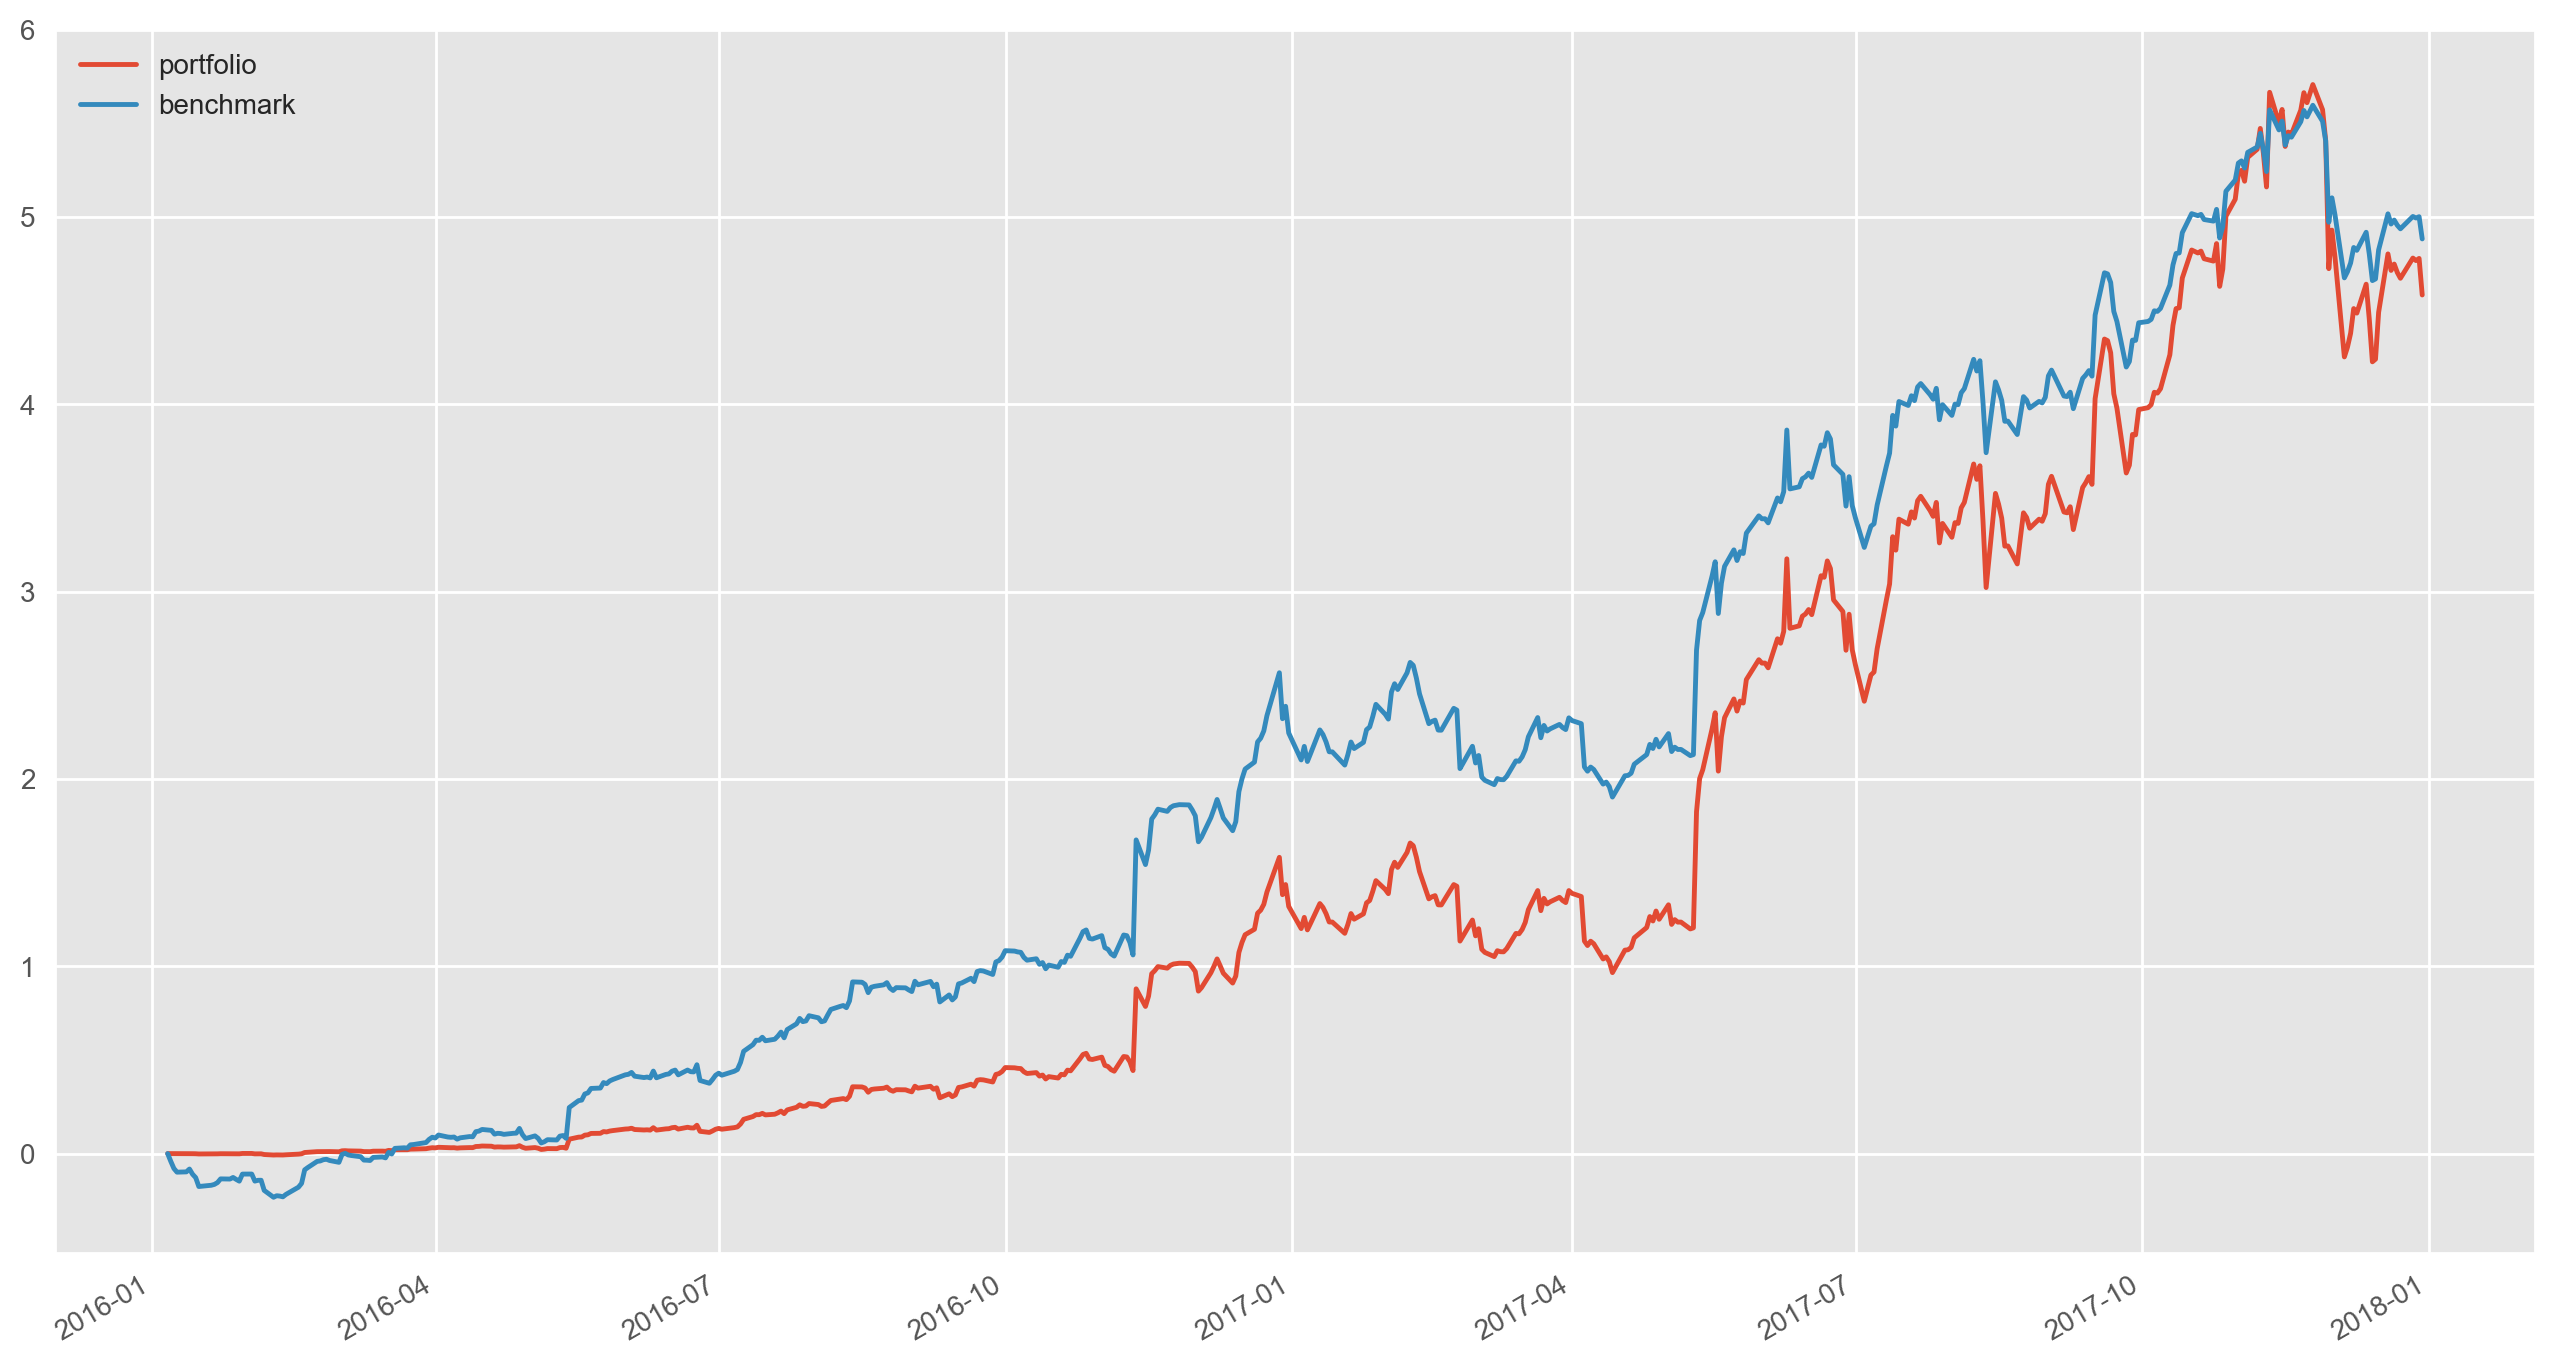

In [43]:
import matplotlib.pyplot as plt
from matplotlib import style


style.use("ggplot")

perf.portfolio_value.pct_change().fillna(0).add(1).cumprod().sub(1).plot(label='portfolio')
perf.NVDA.pct_change().fillna(0).add(1).cumprod().sub(1).plot(label='benchmark')
plt.legend(loc=2)

plt.show()

In [8]:
perf

,NVDA,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2016-01-05 21:00:00+00:00,32.889999,NaN,0.000000,NaN,0.016064,NaN,NaN,0.000000,100000.000000,0.000000e+00,...,0.0,0.0,0,NaN,100000.000000,0.000000e+00,0.000000e+00,1,[],0.0
2016-01-06 21:00:00+00:00,31.530001,0.000019,-0.000002,-0.000118,-0.025950,0.644473,0.000029,-315.467657,99684.532343,3.153000e+02,...,0.0,0.0,0,-11.224972,100000.000000,0.000000e+00,0.000000e+00,2,"[{'amount': 10, 'order_id': '308f29a7707b4af49...",0.0
2016-01-07 21:00:00+00:00,30.280001,0.001153,-0.000128,-0.004867,-0.064566,0.518573,0.001083,-302.961407,99381.570936,6.056000e+02,...,0.0,0.0,0,-9.285693,99684.532343,3.153000e+02,3.153000e+02,3,"[{'amount': 10, 'order_id': 'bb6a3e9d2fe04fe4b...",0.0
2016-01-08 21:00:00+00:00,29.629999,0.001176,-0.000260,-0.010506,-0.084646,0.423415,0.001078,-296.458142,99085.112795,8.889000e+02,...,0.0,0.0,0,-11.295272,99381.570936,6.056000e+02,6.056000e+02,4,"[{'amount': 10, 'order_id': '430979b079634c699...",0.0
2016-01-11 21:00:00+00:00,29.680000,0.001161,-0.000246,-0.006170,-0.083102,0.402232,0.001464,-296.958403,98788.154392,1.187200e+03,...,0.0,0.0,0,-9.581123,99085.112795,8.889000e+02,8.889000e+02,5,"[{'amount': 10, 'order_id': '74979c467891412aa...",0.0
2016-01-12 21:00:00+00:00,30.180000,0.001912,-0.000048,0.006678,-0.067655,0.421167,0.003051,-301.960903,98486.193489,1.509000e+03,...,0.0,0.0,0,-1.704402,98788.154392,1.187200e+03,1.187200e+03,6,"[{'amount': 10, 'order_id': 'c9958a422623463a9...",0.0
2016-01-13 21:00:00+00:00,29.260000,0.003233,-0.000510,-0.001551,-0.096077,0.401313,0.004744,-292.756302,98193.437186,1.755600e+03,...,0.0,0.0,0,-6.159727,98486.193489,1.509000e+03,1.509000e+03,7,"[{'amount': 10, 'order_id': 'ac9e55382c8d4681b...",0.0
2016-01-14 21:00:00+00:00,28.670000,0.003388,-0.000865,-0.008237,-0.114303,0.373125,0.005095,-286.853351,97906.583835,2.006900e+03,...,0.0,0.0,0,-7.952686,98193.437186,1.755600e+03,1.755600e+03,8,"[{'amount': 10, 'order_id': '6c04fd6504d0492ca...",0.0
2016-01-15 21:00:00+00:00,27.110001,0.006106,-0.001959,-0.004791,-0.162496,0.407093,0.010344,-271.245556,97635.338279,2.168800e+03,...,0.0,0.0,0,-8.274358,97906.583835,2.006900e+03,2.006900e+03,9,"[{'amount': 10, 'order_id': '5ea3f953c38e4888b...",0.0
2016-01-19 21:00:00+00:00,27.330000,0.006085,-0.001784,-0.000127,-0.155700,0.407592,0.010799,-273.446649,97361.891630,2.459700e+03,...,0.0,0.0,0,-7.149278,97635.338279,2.168800e+03,2.168800e+03,10,"[{'amount': 10, 'order_id': '6da2e8b55a88456da...",0.0
